In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yt                                                                                                                                                    
from yt import derived_field




In [4]:
#derived fields are
#define based on existing data fields within the dataset
#the decorator @derived_field makes it easier.

#These derived fields define coordinates and velocities in spherical coordinates.
#Can be useful.

@derived_field(name='mycostheta',sampling_type='cell')
def _mycostheta(field,data):
    return data['z']/np.sqrt(data['r']**2+data['z']**2)

@derived_field(name='mysintheta',sampling_type='cell')
def _mysintheta(field,data):
    return data['r']/np.sqrt(data['r']**2+data['z']**2)


@derived_field(name='vrad',units='cm/s',sampling_type='cell')
def _vrad(field,data):
    return data['vely']*data['mycostheta']+data['velx']*data['mysintheta']


@derived_field(name='vphi',units='cm/s',sampling_type='cell')
def _vphi(field,data):
    return data['vely']*data['mysintheta']-data['velx']*data['mycostheta']

@derived_field(name='spherical_radius',units='cm',sampling_type='cell')
def _spherical_radius(field,data):
    return np.sqrt(data['z']**2+data['r']**2)


#without the decorator you need to do something like
#
# def _density_squared(field, data):
#     return data["density"] ** 2

# yt.add_field(("gas", "density_squared"), function=_density_squared, units="g**2/cm**6")


In [33]:
# create profiles of data, binning data according to one or more fields 

# To create a profile, specify the 
# fields for binning and the fields to profle. 
# The result is a profile object that can used in a simliar manner as to normal yt objects.

ck_f = 's20_0.75_hdf5_plt_cnt_1595'
ds = yt.load(ck_f)

all_data = ds.all_data() #You need to get all the data to do the binning

#There are a few ways of making profils
#1
profile = yt.create_profile(all_data,bin_fields=("spherical_radius"), 
                            fields=["dens"], weight_field="cell_volume")
#2
profile1D = yt.Profile1D(all_data, ('spherical_radius'), 500, 1e3, 1e8,
                         False,weight_field="cell_volume")
profile1D.add_fields('dens') #here we need to add the field later.

#The numbers in profile1D are numpoints, rmin,rmax and then the false 
#means no log-spacing on x-axis. Log spacing can be good, but can give
#issues at small r.

yt : [WARNING  ] 2024-05-22 14:41:04,744 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2024-05-22 14:41:04,795 Parameters: current_time              = 1.1099005177086454
yt : [INFO     ] 2024-05-22 14:41:04,798 Parameters: domain_dimensions         = [ 60 120   1]
yt : [INFO     ] 2024-05-22 14:41:04,799 Parameters: domain_left_edge          = [ 0.e+00 -1.e+09  0.e+00]
yt : [INFO     ] 2024-05-22 14:41:04,801 Parameters: domain_right_edge         = [1.00000000e+09 1.00000000e+09 6.28318531e+00]
yt : [INFO     ] 2024-05-22 14:41:04,802 Parameters: cosmological_simulation   = 0


In [32]:
#see
#https://yt-project.org/doc/reference/api/yt.data_objects.profiles.html#yt.data_objects.profiles.create_profile
#https://yt-project.org/doc/reference/api/yt.data_objects.profiles.html#yt.data_objects.profiles.create_profile

(10000.0, 5000000.0)

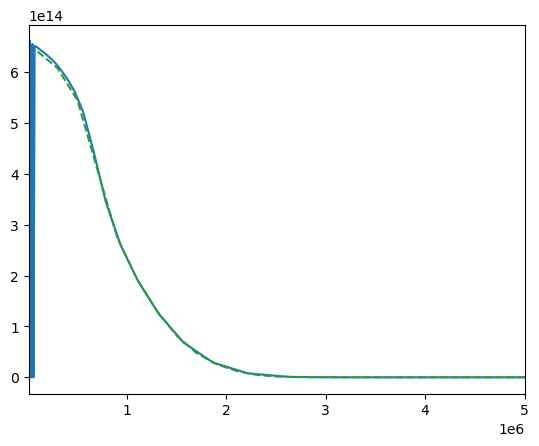

In [34]:
plt.plot(profile.x,profile['dens'])
plt.plot(profile1D.x,profile1D['dens'],'--',c='C2')
plt.xlim([1e4,0.5e7])